In [48]:
# custom functions
from load_data import load_data
from col_list import col_list

# modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
from datetime import datetime
import scipy.stats as stats
from math import sqrt
warnings.filterwarnings('ignore')

In [4]:
dir = '~/DSI/covid-symptom-searches/data/'
nrows= None
usecols = col_list()

hospital, _, _ = load_data(dir,nrows,usecols)

<AxesSubplot:xlabel='date'>

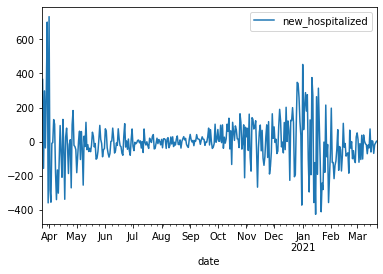

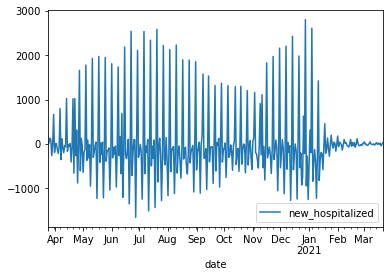

In [55]:
df = hospital[['key','date','new_hospitalized']]

pop_GB = 67886011
pop_BR = 212559417

df['date'] = df['date'].transform(lambda x: datetime.strptime(x, '%Y-%m-%d'))

start_date = datetime.strptime('2020-03-23', '%Y-%m-%d')
end_date = datetime.strptime('2021-03-23', '%Y-%m-%d')
df = df[(df['date'] > start_date) & (df['date'] < end_date)]

hospital_GB = df[df['key'] == 'GB']
hospital_BR = df[df['key'] == 'BR']

hospital_GB['new_hospitalized'] = hospital_GB['new_hospitalized'].diff()#/pop_GB*1e6 # new cases/million people
hospital_BR['new_hospitalized'] = hospital_BR['new_hospitalized'].diff()#/pop_BR*1e6

hospital_GB[['date','new_hospitalized']].set_index('date').plot.line()
hospital_BR[['date','new_hospitalized']].set_index('date').plot.line()

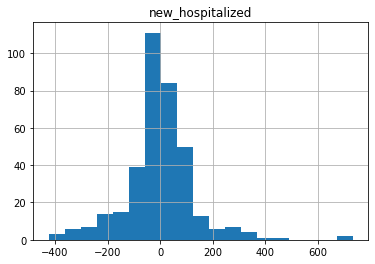

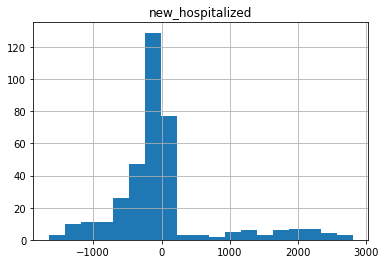

In [56]:
hospital_GB.hist(column = 'new_hospitalized',bins = int(sqrt(hospital_GB.shape[0])));
hospital_BR.hist(column = 'new_hospitalized',bins = int(sqrt(hospital_BR.shape[0])));